<a href="https://colab.research.google.com/github/RoniHernandez99/Circuitos-RF-punto-Q/blob/main/JFET_canalN_autopolarizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autopolarización de voltaje para un transistor JFET de canal N**



## **1) Datos**

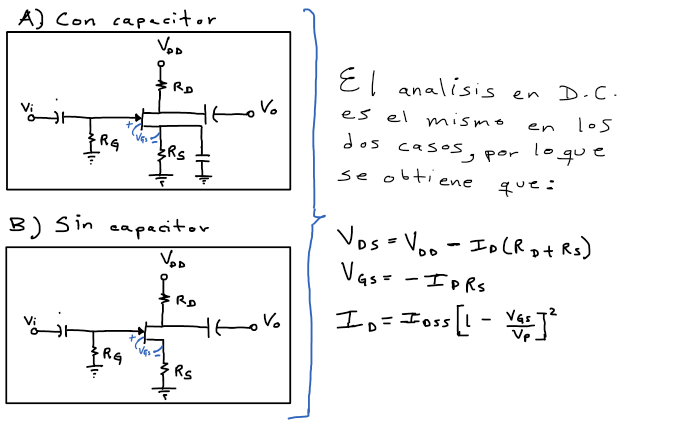

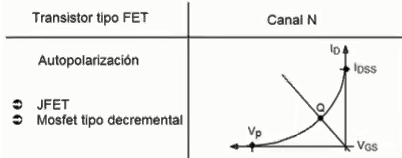

Es importante recordar que los transistores JFET no pueden dar corrientes mayores a $I_{DSS}$

##**2) Obteniendo su punto de operacion Q para un transistor JFET de canal N**

## **Programador: David Roni Hernández Beltrán** 

### **1) Metodo iterativo**

Ecuacion 1:

$I_{D}=I_{DSS}(1-\frac{V_{GS}}{V_{P}})^2$

Ecuacion 2:

$V_{GS}=-I_{D}R_{S}$

$-V_{GS}=I_{D}R_{S}$

$I_{D}=\frac{ - V_{GS} }{ R_{S} } $


Igualdad que se debe cumplir:

$$I_{DSS}(1-\frac{V_{GS}}{V_{P}})^2=\frac{ - V_{GS} }{ R_{S} } $$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#####################################################
# C O N S T A N T E S
#####################################################
rs=1100           # [Ω]
vp=-4             # [V]
idss= 0.010       # [A]
#####################################################


#####################################################
# C O D I G O
#####################################################

ecuacion_1= lambda vgs,vp,idss: idss*( 1-(vgs/vp) )**2
ecuacion_2= lambda vgs,rs: -vgs/rs

# dominio
array_vgs=np.arange(vp,0,0.00001)

# Calculando ID con la ecuacion 1 y la ecuacion 2 para todos los valores que contiene
# 'array_vgs', posteriormente obteniendo unicamente  la diferencia entre ambos resultados,
# es importante mencionar que esto lo hago debido a que el valor correcto de vgs sera aquel
# que al evaluarlo en la ecuacion 1 y al evaluarlo en la ecuacion 2 de exactamente lo mismo
# o casi lo mismo, en otra palabras el valor correcto de vgs sera en donde la diferencia 
# entre el ID obtenido en la ecuacion 1 y la ecuacion 2 sea la mas pequeña posible, por 
# tal motivo obtengo la diferencia de la ecuacion 1 y la ecuacion 2 para cada valor de:
# 'array_vgs'
diferencia_array=np.abs (ecuacion_1(array_vgs,vp,idss) - ecuacion_2(array_vgs,rs) )

# obteniendo un array de booleanos del mismo tamaño que el array: 'array_vgs', esta array booleano solo
# almacenara el valor de: 'True' en la posicion en la que se encuentra la diferencia mas pequeña entre 
#el resultado de evaluar un valor del 'array_vgs' en la ecuacion 1 y ecuacion 2 
bool_array= diferencia_array==min(diferencia_array)

# por medio del array de booleanos obtenido en la linea anterior, se obtiene el valor
# de vgs que corresponde a la posicion en donde el boleano tiene el valor de: True, o en
# otras palabras obteniendo el valor de vgs que al evaluarlo en la ecuacion 1 y ecuacion 2 
# da la diferencia mas pequeña entre ambos resultados
vgs_correcto=array_vgs[bool_array]
vgs_correcto=vgs_correcto[0]

# ya que se conoce el valor de vgs se obtiene el valor correspondiente de id, con ayuda de 
# la ecuacion 1
id_correcto=ecuacion_1(vgs_correcto,vp,idss) 


mensaje_resultados=f"""
Resultados:

  Vgs={vgs_correcto}[V]
  Id={id_correcto}[A]
"""
print(mensaje_resultados)


# Comprobando la veracidad de los resultados:

comprobacion_ec1=ecuacion_1(vgs_correcto,vp,idss)
comprobacion_ec2=ecuacion_2(vgs_correcto,rs)

mensaje_comprobacion=f"""
Comprobacion de resultados:

El valor obtenido de vgs={vgs_correcto}[V] al evalularlo en la ecuacion 1 y
ecuacion 2 debe dar algo muy similar, veamos los resultados:
Al evaluar vgs={vgs_correcto}[V] en la ecuacion1={comprobacion_ec1}[A]
Al evaluar vgs={vgs_correcto}[V] en la ecuacion2={comprobacion_ec2}[A]
La diferencia entre ambos resultados= {abs(comprobacion_ec1-comprobacion_ec2)}
"""

print(mensaje_comprobacion)


Resultados:

  Vgs=-2.20792999998826[V]
  Id=0.002007196803088799[A]


Comprobacion de resultados:

El valor obtenido de vgs=-2.20792999998826[V] al evalularlo en la ecuacion 1 y
ecuacion 2 debe dar algo muy similar, veamos los resultados:
Al evaluar vgs=-2.20792999998826[V] en la ecuacion1=0.002007196803088799[A]
Al evaluar vgs=-2.20792999998826[V] en la ecuacion2=0.002007209090898418[A]
La diferencia entre ambos resultados= 1.2287809618774514e-08



### **) Metodo analitico**


Ecuacion 1:

$I_{D}=I_{DSS}(1-\frac{V_{GS}}{V_{P}})^2$

Ecuacion 2:

$V_{GS}=-I_{D}R_{S}$

Sustituyendo ecuacion dos en ecuacion 1:

$$I_{D}=I_{DSS}(1-\frac{-I_{D}R_{S}}{V_{P}})^2$$

$I_{DSS}(1-\frac{-I_{D}R_{S}}{V_{P}})^2-I_{D}=0$

$I_{DSS}(1+\frac{I_{D}R_{S}}{V_{P}})^2-I_{D}=0$

$I_{DSS}(1+2(\frac{I_{D}R_{S}}{V_{P}})+  (\frac{I_{D}R_{S}}{V_{P}})^2 ) -I_{D}   =0  $

$I_{DSS}(1+\frac{2I_{D}R_{S}}{V_{P}}+  \frac{ I_{D}^2R_{S}^2 }{V_{P}^2}) -I_{D} =0  $

$\frac{1}{I_{DSS}}[I_{DSS}(1+\frac{2I_{D}R_{S}}{V_{P}}+  \frac{ I_{D}^2R_{S}^2 }{V_{P}^2}) -I_{D} ]=  \frac{1}{I_{DSS}}[0]  $


$\frac{I_{DSS}}{I_{DSS}}(1+\frac{2I_{D}R_{S}}{V_{P}}+  \frac{ I_{D}^2R_{S}^2 }{V_{P}^2}) - \frac{I_{D}}{I_{DSS}} =  0 $


$(1+\frac{2I_{D}R_{S}}{V_{P}}+  \frac{ I_{D}^2R_{S}^2 }{V_{P}^2}) - \frac{I_{D}}{I_{DSS}} =  0 $


$1+\frac{2I_{D}R_{S}}{V_{P}}+  \frac{ I_{D}^2R_{S}^2 }{V_{P}^2} - \frac{I_{D}}{I_{DSS}} = 0$


$1+\frac{2R_{S}}{V_{P}}I_{D}+  \frac{ R_{S}^2}{V_{P}^2}I_{D}^2 - \frac{1}{I_{DSS}}I_{D} =0  $


$\frac{R_{S}^2}{V_{P}^2}I_{D}^2 + \frac{2R_{S}}{V_{P}}I_{D}  - \frac{1}{I_{DSS}}I_{D} +1=0 $


$(\frac{R_{S}^2}{V_{P}^2})I_{D}^2 + (\frac{2R_{S}}{V_{P}}-\frac{1}{I_{DSS}})I_{D} + (1)=0$



Se puede apreciar perfectamente, que la ecuacion resultante al simplificar y ordenar es una ecuacion cuadratica:

$$(\frac{R_{S}^2}{V_{P}^2})I_{D}^2 + (\frac{2R_{S}}{V_{P}}-\frac{1}{I_{DSS}})I_{D} + (1)=0$$

La cual  al resolverla nos dara dos valores para $I_D$:
* $I_{D1}$
* $I_{D2}$

El valor correcto de $I_D$ sera al que le corresponda un valor de $V_{GS}$ en el rango de valores: $[V_P,0]$

Es decir:

* Si al sustituir $I_{D1}$ en la ecuacion 2 obtenemos que:  $V_P \leq V_{GS} \leq0$, eso significara que $I_{D1}$ es el valor correcto, es decir:
  
    * Si al hacer lo siguiente: $V_{GS}=V_{G}-I_{D1}R_{S}$
    * Se obtiene que:  $V_P \leq V_{GS} \leq0$
    * Significara que $I_{D1}$ es el valor correcto

* Si al sustituir $I_{D2}$ en la ecuacion 2 obtenemos que:  $V_P \leq V_{GS} \leq0$, eso significara que $I_{D2}$ es el valor correcto, es decir:
  
    * Si al hacer lo siguiente: $V_{GS}=V_{G}-I_{D2}R_{S}$
    * Se obtiene que:  $V_P \leq V_{GS} \leq0$
    * Significara que $I_{D2}$ es el valor correcto


In [ ]:
#####################################################
# C O N S T A N T E S
#####################################################
rs=1100           # [Ω]
vp=-4             # [V]
idss= 0.010       # [A]
#####################################################

#####################################################
# C O D I G O
#####################################################

Ax2= rs**2 / vp**2
Bx=  (2*rs/vp) - (1/idss)
C=  1


id_1,id_2=dameRaicesPolinomioCuadratico(Ax2,Bx,C)
vgs_1=-id_1*rs
vgs_2=-id_2*rs


id_correcto=None
vgs_correcto=None

if vp<=vgs_1<=0:
  id_correcto=id_1
  vgs_correcto=vgs_1
elif vp<=vgs_2<=0:
  id_correcto=id_2
  vgs_correcto=vgs_2

mensaje_resultados=f"""
Resultados:

  Los valores obtenidos de Id son los siguientes:

    Id1={id_1}[A]
    Id2={id_2}[A]

  Los valors Vgs obtenidos para cada valor de Id, son los siguientes:

    Vgs1={vgs_1}[V]
    Vgs2={vgs_2}[V]

  El valor correcto de ID es:

    Id={id_correcto}[A]
    Vgs={vgs_correcto}[V]
"""

print(mensaje_resultados)



Resultados:

  Los valores obtenidos de Id son los siguientes:

    Id1=0.0020072055437105754[A]
    Id2=0.006587835778603474[A]

  Los valors Vgs obtenidos para cada valor de Id, son los siguientes:

    Vgs1=-2.207926098081633[V]
    Vgs2=-7.246619356463821[V]

  El valor correcto de ID es:

    Id=0.0020072055437105754[A]
    Vgs=-2.207926098081633[V]



### **3) Metodo grafico**

Ecuacion 1:

$I_{D}=I_{DSS}(1-\frac{V_{GS}}{V_{P}})^2$

Ecuacion 2:

$V_{GS}=-I_{D}R_{S}$

$-V_{GS}=I_{D}R_{S}$

$I_{D}=\frac{ - V_{GS} }{ R_{S} } $


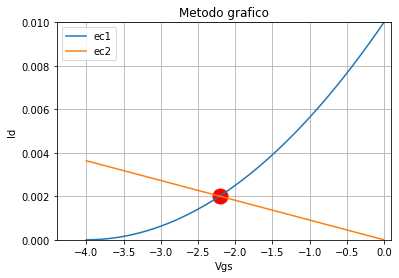


Resultados:

  El punto aproximado en donde interceptan las dos graficas es: 
    (-2.2079999999962183[V],0.0020072727272692895[A])

  Por lo cual los valores aproximados correctos de Vgs e Id son:
    Id=0.0020072727272692895[A]
    Vgs=-2.2079999999962183[V]



In [ ]:
#####################################################
# C O N S T A N T E S
#####################################################
rs=1100           # [Ω]
vp=-4             # [V]
idss= 0.010       # [A]
#####################################################


#####################################################
# C O D I G O
#####################################################

# dominio
array_vgs=np.arange(vp,0,0.0001)

ecuacion_1= lambda vgs,vp,idss: idss*( 1-(vgs/vp) )**2
ecuacion_2= lambda vgs,rs: -vgs/rs

r_ecu1=ecuacion_1(array_vgs,vp,idss)
r_ecu2=ecuacion_2(array_vgs,rs)

plt.title('Metodo grafico')
plt.xlabel('Vgs')
plt.ylabel('Id')

# obteniendo el punto en donde interceptan las graficas
idx = np.argwhere(np.diff(np.sign(r_ecu1 - r_ecu2))).flatten()

# graficando el punto de la intercepccion
plt.plot(array_vgs[idx], r_ecu2[idx], 'ro',markersize=15)

# graficando la grafica de la ecuacion 1
plt.plot(array_vgs,r_ecu1,label='ec1')

# graficando la grafica de la ecuacion 2
plt.plot(array_vgs,r_ecu2,label='ec2')

plt.xlim(1.1*vp,0.1)
plt.ylim(0,idss)
plt.grid()
plt.legend()
plt.show()

mensaje_resultados=f"""
Resultados:

  El punto aproximado en donde interceptan las dos graficas es: 
    ({array_vgs[idx][0]}[V],{r_ecu2[idx][0]}[A])

  Por lo cual los valores aproximados correctos de Vgs e Id son:
    Id={r_ecu2[idx][0]}[A]
    Vgs={array_vgs[idx][0]}[V]
"""

print(mensaje_resultados)



# Solucion a ecuaciones de segundo grado

## **Programador: David Roni Hernández Beltrán** 

Resolución de ecuacion de tipo: $a^{2}+bx+c$ apartir de la formula general: $\frac {-b \pm \sqrt {b^2 - 4ac}}{2a}$


### Observacion: 

Para decidir si las raíces a obtener serán complejas, ocupar en la condición que:

$b^{2}-4ac<0$


### ¿Que hago si aparecen numeros negativos en el radicando como en el siguiente:  $\sqrt{-a} $? 

Bueno para darle solucion a lo anterior :

* Recuerdo que un numero complejo   $i=\sqrt{-1}$
* Y que una de las propiedades de las raices $\sqrt{ab}=\sqrt{a}\sqrt{b}$

Por lo cual cuando se presentan numeros negativos en el radicando  $\sqrt{-a}$
lo resuelvo  de la siguiente manera:
* $\sqrt{(-1)(a)}$
* $\sqrt{a}\sqrt{-1}$
* $\sqrt{a}$  $i$

In [ ]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt


#D E F I N I C I O  N    D E    M I S      F U N C I O N E S :  

def dameRaicesPolinomioCuadratico(a,b,c):
    '''
        La  funcion a la cual denomine con el nombre de 'dameRaicesPolinomioCuadradio'
        recibe tres parametros cuyos nombres son 'a', 'b' y 'c' cada uno hace referencia a los
        coeficientes de de la ecuacion  en su forma.... ' ax2+bx+c=0 '  

        La funcion  retorna dos datos, las cuales son las soluciones x1 y x2, dichas soluciones
        pueden ser reales o complejas dependiendo de la funcion que ingresen
    '''

    #PASO1  CALCULANDO EL RADICANDO DE LA FORMULA... sqrt(b^2 -4ac)

    radicando=(b**2)-(4*a*c) #el numero que esta dentro de la raiz cuadrada...

    if radicando<0: #es un numero complejo la solucion...
        raiz=sqrt(abs(radicando)) #el resultado de una raiz cuadrada se le conoce con el nombre de 'raiz'...
        raiz=complex(0,raiz) #creando numero complejo en python, sintaxis==> 'complex(parteReal,parteImaginaria)'
        
    else: #no es un numero complejo la solucion...
         raiz=sqrt(radicando) #el resultado de una raiz cuadrada se le conoce con el nombre de 'raiz'...


    #PASO2 OBTENIENDO... -b-sqrt(b^2 -4ac) && -b+sqrt(b^2 -4ac)

    x_1= -b-raiz  #la respuesta -b -b-sqrt(b^2 -4ac) se almacenara en la variable 'x_1'
    x_2= -b+raiz  #la respuesta -b +b-sqrt(b^2 -4ac) se almacenara en la variable 'x_2'

    #PASO3 DIVIDIENDO ENTRE '2a'  x1 y x2
    x_1/=(2*a)
    x_2/=(2*a)
    return x_1,x_2

def numeroToStringConSigno(numero):
    '''
        La  funcion a la cual denomine con el nombre de 'numeroToStringConSigno'
        recibe un solo parametro cuyo nombre es 'numero', el cual es un dato de 
        tipo numerico,ya sea negativo o positivo real u entero.

        La funcion convertira el dato de tipo numerico ingresado a un dato de tipo string,
        solo que la peculiriadidad de mi funcion es que si el numero es positivo
        le precedera un signo positivo con un espacio blanco, y si es negativo
        hara lo mismo con dicho signo.
    '''
    numeroString=str(abs(numero))
    if numero>=0:
        numeroString=" + "+numeroString
    else:
        numeroString=" - "+numeroString
        
    return numeroString    

def mostrarResul_ecuacionSegundoGrado(a,b,c,graficar=False,rangoX=[-20,20]):
    '''
        La  funcion a la cual denomine con el nombre de 'mostrarResul_ecuacionSegundoGrado'
        recibe cinco parametros cuyos primeros 3 parametros cuyos nombres son 'a', 'b' y 'c' 
        cada uno hace referencia a los coeficientes de de la ecuacion  en su forma.... ' ax2+bx+c=0 '
        Sus ultimos  dos parametros son:
            graficar==>Es un dato de tipo boolean con el cual indicaras si quieres que muestre
            la solucion(es) de la ecuacion en una grafica con su respectiva grafica, o que solo
            se muestren sus solicion(es)
            rangoX==>Este parametro esta muy relacionado con el anterio ya que si se grafica
            a mi funcion le interesa saber el rango del dominio para saber entre que puntos graficar
        El objetivo de esta funcion que cree es mostrar los resultados de la ecuacion de una forma
        mas amigable y didactica.
    '''
    ax2_str=str(a)+"x^2"
    bx_str=numeroToStringConSigno(b)+"x"
    c_str=numeroToStringConSigno(c)
    ecuacion_str=f"{ax2_str}{bx_str}{c_str} = 0"
    
    #Obteniendo las raices de la ecuacion...
    x1,x2=dameRaicesPolinomioCuadratico(a,b,c)
    
    info=f'''ECUACION DE SEGUNDO GRADO: {ecuacion_str}
    Soluciones:
       ** x1={x1}
       ** x2={x2}
    '''
   
    if graficar:
        plt.figure()
        plt.grid()
        if type(x1)!=complex:
            plt.plot(x1,0, marker="o", color="red")
        if type(x2)!=complex:
            plt.plot(x2,0, marker="o", color="red")
        #graficando eje x..
        plt.plot([ rangoX[0],rangoX[1] ], [0,0] )
        
        x=np.arange(rangoX[0],rangoX[1],0.0005)
        y= a*(x**2)+b*(x)+c
        plt.plot(x,y)
        plt.plot([0])
        plt.title(info)
    else:
         print(info)
        